## ReadMe

### Постановка общей задачи:



Проводится работа с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах. На этих данных будет построена модель классификации, определяющая категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

### Описание датасета:



- `id`: идентификатор записи;
- `url`: URL записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.

Ниже представлены задачи по проекту построения модели.


0. *Импорт сторонних библиотек*

В первой ячейке ноутбука импортированы библиотеки, которые необходимы для работы с данными. 

1. *Data Preparation*

В этом блоке:
* произведены преобразования типов данных.
* исследованы и обработаны данные с пропусками.
* обработаны выбросы.

2. *Feature engineering*

В этом блоке:
* категориальные переменные обработаны с помощью LabaleEncoder, OneHotEncoder.
* стандартизированы и нормализованы переменные с помощью StandartScaler, MinMaxScaler.
* созданы новые признаки и удалены неинформативные колонки.
* сформиран финальный датасет, на котором будет производиться моделирование.

3. *Modelling*

В этом блоке:
* инициализированы фичи и целевая переменная.
* данные разделены на тренировачную и тестовую выборки.
* с помощью кросс-валидации на тренировочной выборке выбрана лучшая из трех моделей: логистическая регрессия, случайный лес и многослойный персептрон.
* на тренировочных и тестовых данных обучена модель случайного леса.

4. *Results*

В этом блоке:
* модель обучена на всём датасете, сохранена в `pickle`.

## Загрузка данных, создание датафрейма.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
import pickle

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/28.6 df_out.csv')

In [ ]:
df_c = df.copy().set_index('id')

In [ ]:
df_c.shape

(10000, 19)

In [ ]:
df_c.head()

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,
7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020.0,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016.0,ford,explorer 4wd 4dr xlt,NaN,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017.0,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013.0,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021.0,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


## Data preparation

### Data cleaning

In [ ]:
df_c.columns.tolist()

['url',
 'region',
 'region_url',
 'price',
 'year',
 'manufacturer',
 'model',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'image_url',
 'description',
 'state',
 'lat',
 'long',
 'posting_date',
 'price_category',
 'date']

In [ ]:
df_c.describe()

,price,year,odometer,lat,long
count,1.000000e+04,9964.000000,10000.00000,9902.000000,9902.000000
mean,2.067842e+04,2010.927941,93324.13400,38.594142,-94.165877
std,1.246230e+05,9.672040,63181.17499,5.844895,18.128504
min,5.000000e+02,1915.000000,0.00000,-67.144243,-158.069300
25%,7.900000e+03,2008.000000,39147.25000,34.830368,-110.322086
50%,1.574950e+04,2013.000000,89000.00000,39.298522,-88.000050
75%,2.799000e+04,2017.000000,136875.00000,42.428070,-80.830000
max,1.234568e+07,2022.000000,283466.00000,64.947500,173.885502


Работа с пропусками.

In [ ]:
#Проверяем наличие пропусков в колонках.
df_c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7308295377 to 7311960763
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             10000 non-null  object 
 1   region          10000 non-null  object 
 2   region_url      10000 non-null  object 
 3   price           10000 non-null  int64  
 4   year            9964 non-null   float64
 5   manufacturer    10000 non-null  object 
 6   model           9872 non-null   object 
 7   fuel            9937 non-null   object 
 8   odometer        10000 non-null  int64  
 9   title_status    9834 non-null   object 
 10  transmission    9955 non-null   object 
 11  image_url       9998 non-null   object 
 12  description     9998 non-null   object 
 13  state           10000 non-null  object 
 14  lat             9902 non-null   float64
 15  long            9902 non-null   float64
 16  posting_date    9998 non-null   object 
 17  price_category  1

In [ ]:
#Изучаем количество пропусков.
df_c.isna().sum()

url               0
region            0
region_url        0
price             0
year              0
manufacturer      0
model             0
fuel              0
odometer          0
title_status      0
transmission      0
image_url         0
description       0
state             0
lat               0
long              0
posting_date      0
price_category    0
date              0
dtype: int64

In [ ]:
#Удаляем строки с пропуском года выпуска.
df_c = df_c.drop(labels = df_c[df_c.year.isna()].index, axis=0)

In [ ]:
df_c.model = df_c.model.fillna('other')

In [ ]:
df_c.fuel.value_counts(dropna=False)

gas         8379
other        729
diesel       650
hybrid       108
NaN           54
electric      44
Name: fuel, dtype: int64

In [ ]:
#Пропуски в колонке вид топлива заполняем преобладающим значением.
df_c.fuel = df_c.fuel.fillna('gas')

In [ ]:
df_c.title_status.value_counts(dropna=False)

clean         9492
rebuilt        168
NaN            159
salvage         92
lien            35
missing         16
parts only       2
Name: title_status, dtype: int64

In [ ]:
df_c.title_status = df_c.title_status.fillna('clean')

In [ ]:
df_c.transmission.value_counts(dropna=False) 

automatic    7667
other        1623
manual        631
NaN            43
Name: transmission, dtype: int64

In [ ]:
#Пропуски в колонке трансмиссия заполняем преобладающим значением.
df_c.transmission = df_c.transmission.fillna('automatic')

In [ ]:
#Пропуски в колонке широта и долгота заполняем среднимм значением по колонке.
df_c.lat = df_c.lat.fillna(df_c.lat.mean())

In [ ]:
df_c.long = df_c.long.fillna(df_c.long.mean())

Обработка выбросов.


In [ ]:
#Функция для поиска выбросов
def calculate_outliers_3sigma(data):
    a25 = data.mean() - data.std() * 3
    a75 = data.mean() + data.std() * 3
    b = (a25, a75)
    return b
#Функция для удаления выбросов
def delete_vibros(data):
    elems = []
    data = data.index
    for elem in data:
        elems.append(elem)
    df_c.drop(elems, axis=0, inplace=True)

In [ ]:
df_c.describe()

,price,year,odometer,lat,long
count,9.964000e+03,9964.000000,9964.000000,9964.000000,9964.000000
mean,2.059957e+04,2010.927941,93587.909976,38.602746,-94.138420
std,1.248351e+05,9.672040,63125.348030,5.817462,18.045684
min,5.000000e+02,1915.000000,0.000000,-67.144243,-158.069300
25%,7.900000e+03,2008.000000,39379.750000,34.935200,-108.553946
50%,1.559000e+04,2013.000000,89137.500000,39.208179,-88.136721
75%,2.799000e+04,2017.000000,137000.000000,42.402740,-80.935850
max,1.234568e+07,2022.000000,283466.000000,64.947500,173.885502


In [ ]:
#Выбросы по столбцу price.
b_price = calculate_outliers_3sigma(df_c.price)
b_price

(-353905.801615144, 395104.9318841123)

In [ ]:
vibros_price = (df_c['price'] < b_price[0]) | (df_c['price'] > b_price[1])
vibros_price.sum()

2

In [ ]:
df_c[(df_c['price'] > b_price[1])]

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,
7302112231,https://akroncanton.craigslist.org/ctd/d/canto...,akron / canton,https://akroncanton.craigslist.org,12345678,2019.0,chevrolet,other,gas,100000,clean,automatic,https://images.craigslist.org/00F0F_g6k0zWbump...,"WE HAVE MOVED TO 2517 FULTON DRIVE NW CANTON, ...",oh,40.8465,-81.4408,2021-04-05T12:26:23-0400,high,2021-04-05 16:26:23+00:00
7305237859,https://delaware.craigslist.org/cto/d/delaware...,delaware,https://delaware.craigslist.org,1000000,2022.0,other,Any make any model,other,283466,clean,other,https://images.craigslist.org/00S0S_k3A68PVXRC...,We come to you and give you an easy quick tran...,de,39.5725,-75.5957,2021-04-11T13:51:42-0400,high,2021-04-11 17:51:42+00:00


In [ ]:
delete_vibros(df_c[df_c['price'] > b_price[1]])

In [ ]:
#Выбросы по столбцу odometer.
b_odometer = calculate_outliers_3sigma(df_c.odometer)
b_odometer

(-95740.72346894913, 282877.1356351808)

In [ ]:
vibros_odometer = (df_c['odometer'] < b_odometer[0]) | (df_c['odometer'] > b_odometer[1])
vibros_odometer.sum()

91

In [ ]:
df_c[(df_c['odometer'] > b_odometer[1])]

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,
7311516735,https://easttexas.craigslist.org/cto/d/lufkin-...,tyler / east TX,https://easttexas.craigslist.org,17000,2003.0,dodge,3500,diesel,283466,clean,automatic,https://images.craigslist.org/00Q0Q_8WsRzpw9LV...,2003 Dodge 3500 4x4 diesel dually. It has 307k...,tx,31.270000,-94.646900,2021-04-23T14:27:25-0500,medium,2021-04-23 19:27:25+00:00
7310943842,https://showlow.craigslist.org/ctd/d/pinetop-2...,show low,https://showlow.craigslist.org,2795,2004.0,mazda,tribute,gas,283466,clean,automatic,https://images.craigslist.org/00y0y_9hjvC3qkk3...,ACCUSHINE AUTO SALES 1827 E. WHITE MTN. BLVD. ...,az,34.117500,-109.919700,2021-04-22T10:52:07-0700,low,2021-04-22 17:52:07+00:00
7306101528,https://desmoines.craigslist.org/ctd/d/windom-...,des moines,https://desmoines.craigslist.org,59950,2013.0,other,CATERPILLAR CT660S,diesel,283466,clean,automatic,https://images.craigslist.org/00I0I_UkoGuDPqYZ...,LA MOTORSPORTS DIESELTRUCKSMN.COM 2013 CATERP...,ia,43.863689,-95.113792,2021-04-13T08:34:24-0500,high,2021-04-13 13:34:24+00:00
7304168190,https://elpaso.craigslist.org/ctd/d/las-cruces...,el paso,https://elpaso.craigslist.org,16999,2016.0,jeep,renegade,gas,283466,clean,automatic,https://images.craigslist.org/00Q0Q_ajHii9qB6e...,"‘16 Jeep Renegade Limited, auto, air, power wi...",tx,32.288990,-106.781616,2021-04-09T09:26:05-0600,medium,2021-04-09 15:26:05+00:00
7314722320,https://nh.craigslist.org/ctd/d/medford-2015-h...,new hampshire,https://nh.craigslist.org,26500,2015.0,other,HINO 268A,diesel,283466,clean,automatic,https://images.craigslist.org/01111_aEpkHS4iop...,"2015 HINO 268A 24' REFRIG NCDL 260 HP, ALLISIO...",nh,42.417300,-71.108700,2021-04-30T07:30:45-0400,high,2021-04-30 11:30:45+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7316485896,https://fortmyers.craigslist.org/lee/cto/d/for...,ft myers / SW florida,https://fortmyers.craigslist.org,18500,2021.0,ford,f450 super duty,diesel,283466,clean,automatic,https://images.craigslist.org/00W0W_bzRFeRTjqS...,"2021 Ford F450, 4-Door Dully, Cold Ac, New Hea...",fl,26.558000,-81.903000,2021-05-03T18:56:13-0400,medium,2021-05-03 22:56:13+00:00
7314148003,https://kansascity.craigslist.org/cto/d/lees-s...,"kansas city, MO",https://kansascity.craigslist.org,2999,2010.0,chevrolet,hhr ls,gas,283466,clean,automatic,https://images.craigslist.org/00n0n_h4YYCjZeD9...,2010 CHEVY HHR LS --- POWER LOCKS/WINDOWS/MIRR...,ks,38.851800,-94.394400,2021-04-28T20:15:49-0500,low,2021-04-29 01:15:49+00:00
7313696556,https://mcallen.craigslist.org/cto/d/mcallen-2...,mcallen / edinburg,https://mcallen.craigslist.org,4500,2003.0,chevrolet,avalanche,gas,283466,clean,automatic,https://images.craigslist.org/00m0m_ey8pcui9d1...,Vendo mi Chevrolet Avalanche 2003 que está en ...,tx,26.215400,-98.235900,2021-04-27T23:10:38-0500,low,2021-04-28 04:10:38+00:00


In [ ]:
delete_vibros(df_c[df_c['odometer'] > b_odometer[1]])

In [ ]:
#Выбросы по столбцу lat.
b_lat = calculate_outliers_3sigma(df_c.lat)
b_lat

(21.17488307600924, 56.048669909686296)

In [ ]:
vibros_lat = (df_c['lat'] < b_lat[0]) | (df_c['lat'] > b_lat[1])
vibros_lat.sum()

102

In [ ]:
df_c[(df_c['lat'] > b_lat[1])]

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,


In [ ]:
delete_vibros(df_c[(df_c['lat'] > b_lat[1])])
delete_vibros(df_c[(df_c['lat'] < b_lat[0])])

In [ ]:
#Выбросы по столбцу long.
b_long = calculate_outliers_3sigma(df_c.long)
b_long

(-144.64092747763186, -42.49108058063412)

In [ ]:
vibros_long = (df_c['long'] < b_long[0]) | (df_c['long'] > b_long[1])
vibros_long.sum()

40

In [ ]:
df_c[(df_c['long'] > b_long[1])]

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,
7311040095,https://stcloud.craigslist.org/ctd/d/2004-infi...,st cloud,https://stcloud.craigslist.org,3499,2004.0,infiniti,g35 sedan,gas,185738,clean,automatic,https://images.craigslist.org/00e0e_an5Srs55ku...,2004 Infiniti G35 Sedan 4dr Sdn AWD Auto w/Lea...,mn,45.5579,94.1632,2021-04-22T15:34:44-0500,low,2021-04-22 20:34:44+00:00


In [ ]:
delete_vibros(df_c[(df_c['long'] > b_long[1])])
delete_vibros(df_c[(df_c['long'] < b_long[0])])

In [ ]:
#Формат колонки года приводим к целому числу.
df_c['year'] = df_c['year'].astype('int')

In [ ]:
df_c.shape

(9729, 19)

### Feature selection

In [ ]:
#Изучаем коррелирующие значения для их дальнейшего анализа и выбора фичей для модели.
df_c.corr()

,price,year,odometer,lat,long
price,1.000000,0.326448,-0.507701,-0.013633,-0.084528
year,0.326448,1.000000,-0.281401,-0.035666,0.025992
odometer,-0.507701,-0.281401,1.000000,0.037408,-0.007293
lat,-0.013633,-0.035666,0.037408,1.000000,-0.115207
long,-0.084528,0.025992,-0.007293,-0.115207,1.000000


In [ ]:
#Создаем сводную таблицу со средним значением цены по году выпуска.
price_year = df_c.groupby('year').price.mean().reset_index()
price_year

,year,price
0,1915,5000.000000
1,1923,14950.000000
2,1927,18500.000000
3,1928,26400.000000
4,1929,6981.666667
...,...,...
84,2018,29969.309824
85,2019,34865.229682
86,2020,37582.656250
87,2021,39713.446809


In [ ]:
#С помощью фильрации отсекаем слабоинформативные по причине малого количества строки. 
years_20 = df_c.iloc[np.where(df_c['year'].value_counts() >= 10)].year.reset_index()

In [ ]:
years_20 = years_20.drop('id', axis=1)

In [ ]:
price_year = price_year.merge(years_20)

In [ ]:
price_year.head()

,year,price
0,1970,30213.571429
1,1994,8842.888889
2,2000,8608.680556
3,2001,7997.347458
4,2001,7997.347458


In [ ]:
#Видим положительную корреляцию год/цена.
price_year.corr()

,year,price
year,1.000000,0.444603
price,0.444603,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

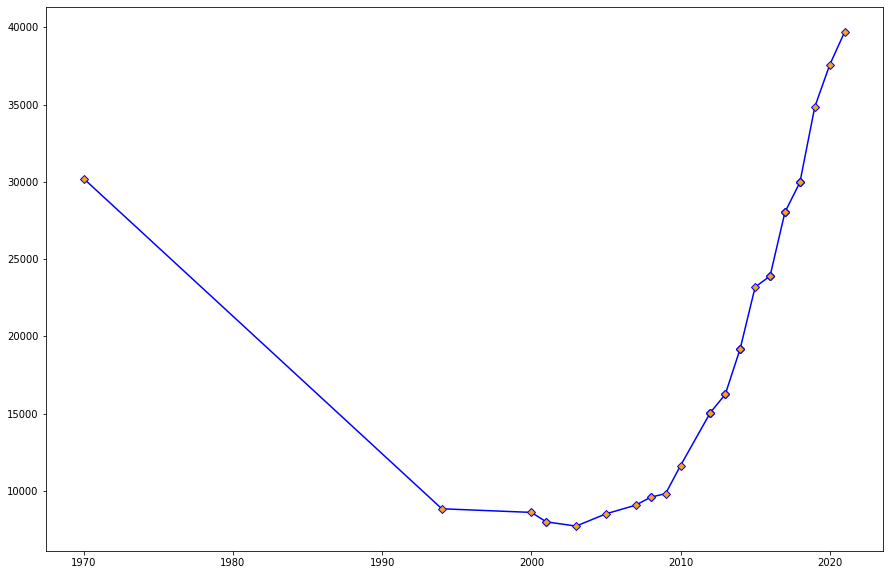

In [ ]:
#С помощью графика подтверждаем увеличение цены с новизной автомобилей. Также видим высокую цену на раритетные авто.
plt.figure(figsize=(15,10))
plt.plot(price_year['year'], price_year['price'],color = 'b', marker = 'D', markerfacecolor = 'orange')
plt.show

In [ ]:
#Создаем сводную таблицу, чтобы проверить зависимость цены от пробега.
svodka_y_o_p = df_c.groupby('year').agg({'price':'mean', 'odometer':'mean'}).reset_index()
svodka_y_o_p.head()

,year,price,odometer
0,1915,5000.000000,12345.000000
1,1923,14950.000000,15000.000000
2,1927,18500.000000,100.000000
3,1928,26400.000000,1310.000000
4,1929,6981.666667,12074.666667


In [ ]:
#Видим отрицательную корреляцию, с увеличением пробега понижается цена.
svodka_y_o_p.corr()

,year,price,odometer
year,1.000000,0.005409,0.618006
price,0.005409,1.000000,-0.488542
odometer,0.618006,-0.488542,1.000000


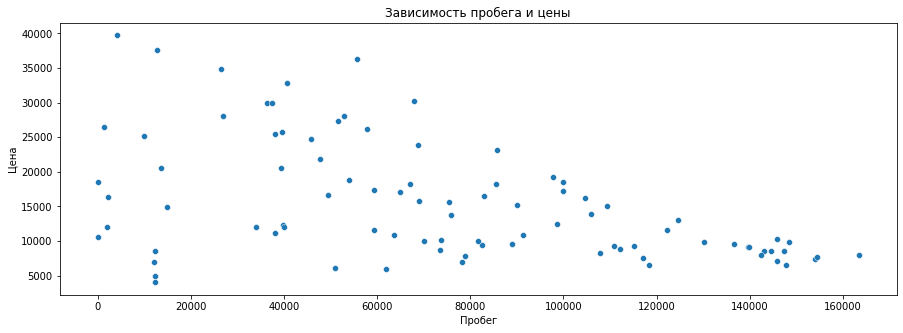

In [ ]:
#На графике небольшой разброс значений, но общая тенденция видна: подтверждается отрицательная корреляция.
plt.figure(figsize=(15,5))
sns.scatterplot(x = svodka_y_o_p['odometer'], y = svodka_y_o_p['price'])
plt.title('Зависимость пробега и цены')
plt.xlabel('Пробег')
plt.ylabel('Цена')
plt.show()

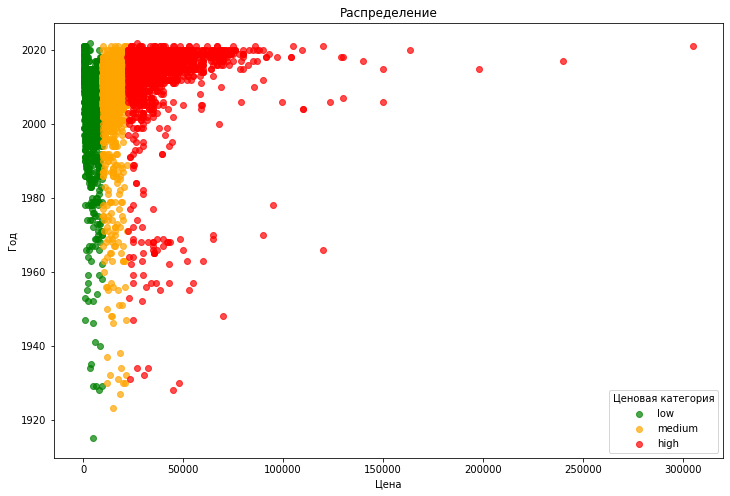

In [ ]:
#Наглядное представление распределения количества автомобилей в зависимости от ценовой категории по годам выпуска. 
colors = {'low':'green', 'medium':'orange', 'high':'red'}
fig, ax = plt.subplots(figsize=(12, 8))
for price_category in colors:
    color = colors[price_category]
    data = df_c[df_c['price_category']==price_category]
    
    
    ax.scatter(data['price'], data['year'], color=color, alpha=0.7)
plt.ylabel('Год')
plt.xlabel('Цена')
plt.title('Распределение')
plt.legend(colors, title='Ценовая категория');

## Feature engineering

In [ ]:
print(f'transmission = {len(df_c.transmission.unique())}')
print(f'region = {len(df_c.region.unique())}')
print(f'manufacturer = {len(df_c.manufacturer.unique())}')
print(f'title_status = {len(df_c.title_status.unique())}')
print(f'price_category = {len(df_c.price_category.unique())}')

transmission = 3
region = 389
manufacturer = 40
title_status = 6
price_category = 3


In [ ]:
df_c.head()

,url,region,region_url,price,year,manufacturer,model,fuel,odometer,title_status,transmission,image_url,description,state,lat,long,posting_date,price_category,date
id,,,,,,,,,,,,,,,,,,,
7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,clean,other,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,tn,35.060000,-85.250000,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00
7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,gas,60023,clean,automatic,https://images.craigslist.org/00x0x_26jl9F0cnL...,***Call Us for more information at: 201-635-14...,nj,40.821805,-74.061962,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00
7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,clean,other,https://images.craigslist.org/00y0y_eeZjWeiSfb...,Carvana is the safer way to buy a car During t...,ca,33.779214,-84.411811,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00
7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,clean,automatic,https://images.craigslist.org/00606_iGe5iXidib...,2013 Toyota RAV4 XLE 4dr SUV Offered by: R...,nc,35.715954,-78.655304,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00
7316474668,https://newyork.craigslist.org/lgi/cto/d/baldw...,new york city,https://newyork.craigslist.org,21800,2021,nissan,altima,gas,8000,clean,automatic,https://images.craigslist.org/00V0V_3pSOiPZ3Sd...,2021 Nissan Altima Sv with Only 8 K Miles Titl...,ny,40.654800,-73.609700,2021-05-03T18:32:06-0400,medium,2021-05-03 22:32:06+00:00


In [ ]:
#Создаем новую колонку зависимости пробега от цены.
df_c['odometer/price'] = df_c.odometer/df_c.price

In [ ]:
#Наблюдаем некорректное написание региона и модели в некоторых строках.
df_c[['region', 'region_url']]

,region,region_url
id,,
7308295377,chattanooga,https://chattanooga.craigslist.org
7316380095,north jersey,https://newjersey.craigslist.org
7313733749,reno / tahoe,https://reno.craigslist.org
7308210929,fayetteville,https://fayetteville.craigslist.org
7316474668,new york city,https://newyork.craigslist.org
...,...,...
7304876387,chautauqua,https://chautauqua.craigslist.org
7316152972,binghamton,https://binghamton.craigslist.org
7310993818,salem,https://salem.craigslist.org


In [ ]:
#Приводим к общим значениям.
region = [i.split('//')[1].split('.')[0] for i in df_c.region_url]

In [ ]:
df_c['region_n'] = region

In [ ]:
#Видно, что наименование модели пишется первым словом строки. Приводим к общим значениям.
df_c.model

id
7308295377       2500 crew cab big horn
7316380095         explorer 4wd 4dr xlt
7313733749             golf r hatchback
7308210929                         rav4
7316474668                       altima
                        ...            
7304876387                         rav4
7316152972                     wrangler
7310993818    a3 2.0t premium plus pzev
7306637427                      cayenne
7311960763       1500 crew cab big horn
Name: model, Length: 9729, dtype: object

In [ ]:
model = [i.split(' ')[0] for i in df_c.model]

In [ ]:
df_c['model_n'] = model

In [ ]:
#Создаем новую колонку с длиной описания объявления, так как само описание не сможет использоваться при обучении модели.
len_descript = []
for i in df_c.description:
    len_descript.append(len(i))

In [ ]:
df_c['description_len'] = len_descript

In [ ]:
df_c.columns

Index(['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'price_category',
       'date', 'odometer/price', 'region_n', 'model_n', 'description_len'],
      dtype='object')

In [ ]:
# Категориальные данные с большим количеством значений преобразуем с помощью LabaleEncoder. 
lb = LabelEncoder().fit(df_c.manufacturer)

In [ ]:
lb_manufacturer = lb.transform(df_c.manufacturer)

In [ ]:
df_c['lb_manufacturer'] = lb_manufacturer

In [ ]:
lb = LabelEncoder().fit(df_c.region_n)

In [ ]:
lb_region = lb.transform(df_c.region_n)

In [ ]:
df_c['lb_region'] = lb_region

In [ ]:
lb = LabelEncoder().fit(df_c.model_n)

In [ ]:
lb_model = lb.transform(df_c.model_n)

In [ ]:
df_c['lb_model'] = lb_model

In [ ]:
df_c.columns

Index(['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'price_category',
       'date', 'odometer/price', 'region_n', 'model_n', 'description_len',
       'lb_manufacturer', 'lb_region', 'lb_model'],
      dtype='object')

In [ ]:
#Численные значения преобразуем с помощью StandartScaler, MinMaxScaler.
data1 = df_c[['lat', 'long', 'year', 'odometer/price', 'description_len']]
data1

,lat,long,year,odometer/price,description_len
id,,,,,
7308295377,35.060000,-85.250000,2020,0.499036,4482
7316380095,40.821805,-74.061962,2016,3.542852,968
7313733749,33.779214,-84.411811,2017,0.394718,4286
7308210929,35.715954,-78.655304,2013,8.089034,3241
7316474668,40.654800,-73.609700,2021,0.366972,538
...,...,...,...,...,...
7304876387,42.123900,-79.189500,2002,33.370412,1710
7316152972,43.216990,-77.755610,2008,7.835323,948
7310993818,44.925908,-122.982753,2011,16.696387,909


In [ ]:
std_scaler = StandardScaler().fit(data1)

In [ ]:
standartized_x = std_scaler.transform(data1)

In [ ]:
new_names = ['lat_std', 'long_std', 'year_std', 'odometer/price_std', 'description_len_std']
df_c[new_names] = standartized_x


In [ ]:
data2 = df_c[['price', 'odometer']]

In [ ]:
mm = MinMaxScaler().fit(data2)

In [ ]:
scaler_minmax = mm.transform(data2)

In [ ]:
new_names_mm = ['price_mm', 'odometer_mm']
df_c[new_names_mm] = scaler_minmax

In [ ]:
df_c.columns

Index(['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model',
       'fuel', 'odometer', 'title_status', 'transmission', 'image_url',
       'description', 'state', 'lat', 'long', 'posting_date', 'price_category',
       'date', 'odometer/price', 'region_n', 'model_n', 'description_len',
       'lb_manufacturer', 'lb_region', 'lb_model', 'lat_std', 'long_std',
       'year_std', 'odometer/price_std', 'description_len_std', 'price_mm',
       'odometer_mm'],
      dtype='object')

In [ ]:
#Колонки с малым количеством значений преобразуем с помощью OneHotEncoder.
ohe = OneHotEncoder(sparse=False)

In [ ]:
ohe.fit(df_c[['fuel']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
ohe_fuel = ohe.transform(df_c[['fuel']])

In [ ]:
df_c[ohe.get_feature_names_out()] = ohe_fuel

In [ ]:
ohe.fit(df_c[['transmission']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [ ]:
ohe_transmission = ohe.transform(df_c[['transmission']])

In [ ]:
df_c[ohe.get_feature_names_out()] = ohe_transmission

In [ ]:
ohe.fit(df_c[['title_status']])
ohe_title_status = ohe.transform(df_c[['title_status']])

/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df_c[ohe.get_feature_names_out()] = ohe_title_status

In [ ]:
df_c['price_category'] = df_c['price_category'].map({'low': 0, 'medium': 1, 'high': 2})

In [ ]:
df_c.columns

Index(['price_category', 'lb_manufacturer', 'lb_region', 'lb_model', 'lat_std',
       'long_std', 'year_std', 'odometer/price_std', 'description_len_std',
       'price_mm', 'odometer_mm', 'fuel_diesel', 'fuel_electric', 'fuel_gas',
       'fuel_hybrid', 'fuel_other', 'transmission_automatic',
       'transmission_manual', 'transmission_other', 'title_status_clean',
       'title_status_lien', 'title_status_missing', 'title_status_parts only',
       'title_status_rebuilt', 'title_status_salvage'],
      dtype='object')

In [ ]:
#Удалим ненужные колонки.
df_c = df_c.drop(['url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer', 'title_status', 'transmission', 'image_url', 'description', 'state', 'lat', 'long', 'posting_date', 'date', 'odometer/price', 'region_n', 'model_n', 'description_len'], axis=1)

In [ ]:
df_c.head()

,price_category,lb_manufacturer,lb_region,lb_model,lat_std,long_std,year_std,odometer/price_std,description_len_std,price_mm,...,fuel_other,transmission_automatic,transmission_manual,transmission_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
id,,,,,,,,,,,,,,,,,,,,,
7308295377,2,32,60,36,-0.667802,0.490901,0.934509,-0.513902,0.596306,0.178952,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7316380095,1,12,238,449,0.444893,1.170846,0.521155,-0.398526,-0.664938,0.053998,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7313733749,2,38,290,539,-0.915141,0.541841,0.624493,-0.517856,0.525958,0.115240,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7308210929,1,37,110,742,-0.541127,0.891689,0.211139,-0.226203,0.150887,0.045978,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7316474668,1,28,241,231,0.412642,1.198332,1.037848,-0.518908,-0.819274,0.069952,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_c.to_csv('df_ready_for_modeling')

## Modeling

In [ ]:
df_c.head()

,price_category,lb_manufacturer,lb_region,lb_model,lat_std,long_std,year_std,odometer/price_std,description_len_std,price_mm,...,fuel_other,transmission_automatic,transmission_manual,transmission_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
id,,,,,,,,,,,,,,,,,,,,,
7308295377,2,32,60,36,-0.667802,0.490901,0.934509,-0.513902,0.596306,0.178952,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7316380095,1,12,238,449,0.444893,1.170846,0.521155,-0.398526,-0.664938,0.053998,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7313733749,2,38,290,539,-0.915141,0.541841,0.624493,-0.517856,0.525958,0.115240,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7308210929,1,37,110,742,-0.541127,0.891689,0.211139,-0.226203,0.150887,0.045978,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7316474668,1,28,241,231,0.412642,1.198332,1.037848,-0.518908,-0.819274,0.069952,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#Инициализируем фичи и целевую переменную.
x = df_c.drop('price_category', axis=1)
y = df_c.price_category

In [ ]:
#Разбиваем датафрейм на тренировочную и тестовую выборки.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
clf = RandomForestClassifier(random_state=42)
log = LogisticRegression(C = 2.5, penalty = 'l2', solver = 'newton-cg')
mlp = MLPClassifier(random_state=42, max_iter=500)

In [ ]:
#Проведем кросс валидацию среди трех моделей, чтобы выбрать лучшую.
cv_score_clf = cross_val_score(clf, x_train, y_train, cv=4)
res_clf = [cv_score_clf.mean(), cv_score_clf.std()]

In [ ]:
cv_score_log = cross_val_score(log, x_train, y_train, cv=4)
res_log = [cv_score_log.mean(), cv_score_log.std()]

In [ ]:
cv_score_mlp = cross_val_score(mlp, x_train, y_train, cv=4)
res_mlp = [cv_score_mlp.mean(), cv_score_mlp.std()]

In [ ]:
print(f'clf = {res_clf}, log = {res_log}, mlp = {res_mlp}')

clf = [0.9997063142184284, 0.00029368580690241497], log = [0.9386207066675039, 0.005752052863311964], mlp = [0.7534494494750055, 0.032175142946325445]


In [ ]:
#Модель случайного леса.
clf = RandomForestClassifier(random_state=42)
clf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
clf_pred_test = clf.predict(x_test)
accuracy_score(clf_pred_test, y_test)

0.999314833847208

Видим что модель не подверглась переобучению на тренировачных данных и демонстрирует отличные результаты на тестовой выборке.

## Results


По резульататам кросс валидации и обучения модели на тестовой выборке, лучше всего себя показала модель случайного леса. Используем ее для обучения на всем датафрейме.

In [ ]:
df_c.head()

,price_category,lb_manufacturer,lb_region,lb_model,lat_std,long_std,year_std,odometer/price_std,description_len_std,price_mm,...,fuel_other,transmission_automatic,transmission_manual,transmission_other,title_status_clean,title_status_lien,title_status_missing,title_status_parts only,title_status_rebuilt,title_status_salvage
id,,,,,,,,,,,,,,,,,,,,,
7308295377,2,32,60,36,-0.667802,0.490901,0.934509,-0.513902,0.596306,0.178952,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7316380095,1,12,238,449,0.444893,1.170846,0.521155,-0.398526,-0.664938,0.053998,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7313733749,2,38,290,539,-0.915141,0.541841,0.624493,-0.517856,0.525958,0.115240,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
7308210929,1,37,110,742,-0.541127,0.891689,0.211139,-0.226203,0.150887,0.045978,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
7316474668,1,28,241,231,0.412642,1.198332,1.037848,-0.518908,-0.819274,0.069952,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
x = df_c.drop('price_category', axis=1)
y = df_c.price_category

In [ ]:
clf = RandomForestClassifier(random_state=42)
clf.fit(x, y)

RandomForestClassifier(random_state=42)

In [ ]:
clf_pred = clf.predict(x)
accuracy_score(clf_pred, y)

1.0

In [ ]:
filename = 'model.pickle'
with open (filename, 'wb') as file:
    pickle.dump(clf, file)

Модель показала 100% предсказательскую способность. Готова для использования.
